In [12]:
# code plots a Moderate Resolution Imaging Spectroradiometer (MODIS) Mosaic of Antarctica (MOA) 
# visual imagery on a polar stereographic map 
#
# written 2022-01-20 by W. Sauthoff (sauthoff@mines.edu)

# import packages
import rioxarray
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# define data and script directory (replace with your data directory file path) and file path
data_dir = '/Volumes/ExtremeSSD/data'
script_dir = '/Users/Wilson/Documents/0-code/scripts'

In [2]:
# MODIS MOA includes a surface morphology map produced from composited image swath data acquired by MODIS over Antarctica for the 2013-2014 austral summer season
# more info, user guide, and downloads: https://nsidc.org/data/nsidc-0730/versions/1
# two different resolutions of 125 m and 750 m to select from (lower resolution will plot faster, 
# but higher resolution will be desirable to zooming into small scales)
# direct download:
# https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0730_MEASURES_MOA2014_v01/geotiff/moa750_2014_hp1_v01.tif
# https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0730_MEASURES_MOA2014_v01/geotiff/moa125_2014_hp1_v01.tif

# MODIS Mosaic of Antarctica surface imagery
moa_highres = data_dir + '/surface-imagery/MODIS-MOA/moa125_2014_hp1_v01.tif' 

In [6]:
# open into an xarray.DataArray
moa_da = rioxarray.open_rasterio(moa_highres)
moa_da

<xarray.DataArray (band: 1, y: 41779, x: 48333)>
[2019304407 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -3.174e+06 -3.174e+06 ... 2.867e+06 2.867e+06
  * y            (y) float64 2.406e+06 2.406e+06 ... -2.816e+06 -2.816e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [5]:
# optionally we can convert xarray.DataArray into an xarray.Dataset
moa_ds = moa_da.to_dataset('band')
moa_ds

<xarray.Dataset>
Dimensions:      (y: 41779, x: 48333)
Coordinates:
  * x            (x) float64 -3.174e+06 -3.174e+06 ... 2.867e+06 2.867e+06
  * y            (y) float64 2.406e+06 2.406e+06 ... -2.816e+06 -2.816e+06
    spatial_ref  int64 0
Data variables:
    1            (y, x) uint16 ...
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

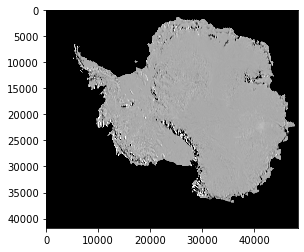

In [7]:
# plot MODIS MOA xarray.DataArray in grayscale colormap (cmap) with specific color limits (clim)
plt.imshow(moa_da[0,:,:], cmap="gray", clim=[14000, 17000])
plt.show()

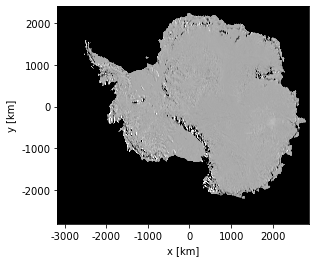

In [19]:
# create figure and axes object
fig, ax = plt.subplots()
# plot MODIS MOA xarray.Dataset using polar stereographic (PS71) extents (extent)
ax.imshow(moa_ds[1], cmap="gray", clim=[14000, 17000],  extent=[moa_ds['x'].min(), moa_ds['x'].max(), moa_ds['y'].min(), moa_ds['y'].max()])
# change polar stereographic m to km
km_scale = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_scale))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_scale))
ax.yaxis.set_major_formatter(ticks_y) 
# label axes
ax.set_xlabel('x [km]', size=10)
ax.set_ylabel('y [km]', size=10)
plt.show()

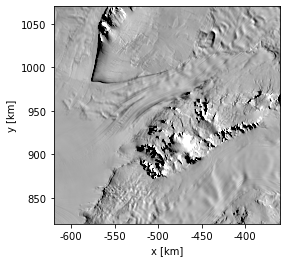

In [20]:
# define bounding box for region of interest: lower Slessor Glacier, East Antarctica
x_min=-6.2e5
x_max=-3.6e5
y_min=0.82e6
y_max=1.07e6

# subset ATL15 data set to region of interest
mask_x = (moa_da.x >= x_min) & (moa_da.x <= x_max)
mask_y = (moa_da.y >= y_min) & (moa_da.y <= y_max)
moa_da_sub = moa_da.where(mask_x & mask_y, drop=True)

# create figure and axes object
fig, ax = plt.subplots()
ax.imshow(moa_da_sub[0,:,:], cmap="gray", clim=[14000, 17000], extent=[x_min, x_max, y_min, y_max])
# change polar stereographic m to km
km_scale = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_scale))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/km_scale))
ax.yaxis.set_major_formatter(ticks_y)
# label axes
ax.set_xlabel('x [km]', size=10)
ax.set_ylabel('y [km]', size=10)
plt.show()

# Reference
Haran, T., J. Bohlander, T. Scambos, T. Painter, and M. Fahnestock. 2021, updated 2019. MODIS Mosaic of Antarctica Image Map, Version 2. Boulder, Colorado USA. NASA National Snow and Ice Data Center Distributed Active Archive Center. doi: https://doi.org/10.5067/68TBT0CGJSOJ.